# Description

It generates a figure with the agreement of the final consensus partitions with the ensemble

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [3]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "clustering").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/clustering')

# Load best partitions

In [4]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/clustering/consensus_clustering')

In [5]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [6]:
best_partitions = pd.read_pickle(input_file)

In [7]:
best_partitions.shape

(59, 4)

In [8]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
12,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089894,True
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


# Threshold

In [9]:
best_parts_stats = best_partitions["ari_median"].describe()
display(best_parts_stats)

count    59.000000
mean      0.066246
std       0.018264
min       0.033275
25%       0.049785
50%       0.067316
75%       0.086079
max       0.090117
Name: ari_median, dtype: float64

In [10]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

0.08607907160043715

# Plot of selected best partitions

In [11]:
plot_data = best_partitions.reset_index()
display(plot_data.head(5))

,k,method,partition,ari_median,selected
0,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
1,22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
2,13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
3,12,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089894,True
4,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


In [12]:
_tmp = best_partitions.columns[
    ~best_partitions.columns.isin(["k", "method", "partition", "selected"])
]
assert _tmp.shape[0] == 1

_measure_col = _tmp[0]
display(_measure_col)

'ari_median'

In [13]:
_selected_measure = "ARI"
_selected_stat = "Median"

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/clustering/selected_best_partitions_by_k.svg')

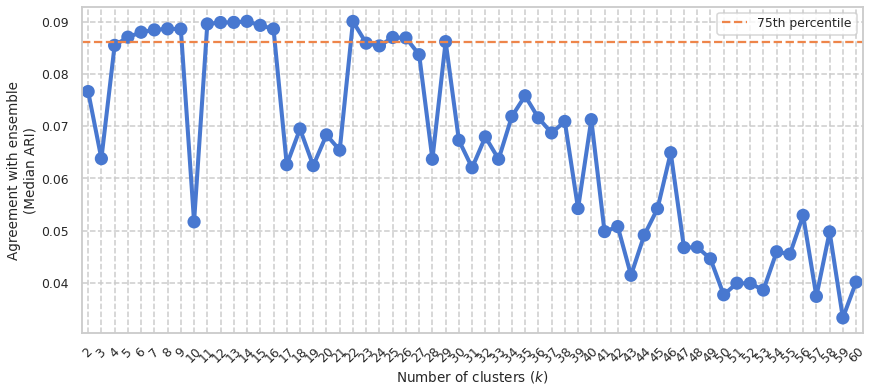

In [14]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(14, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    #     plt.tight_layout()

    output_filepath = OUTPUT_FIGURES_DIR / "selected_best_partitions_by_k.svg"
    display(output_filepath)

    plt.savefig(
        output_filepath,
        #         dpi=600,
        bbox_inches="tight",
        facecolor="white",
    )